In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.datasets
import sklearn.linear_model
%matplotlib inline

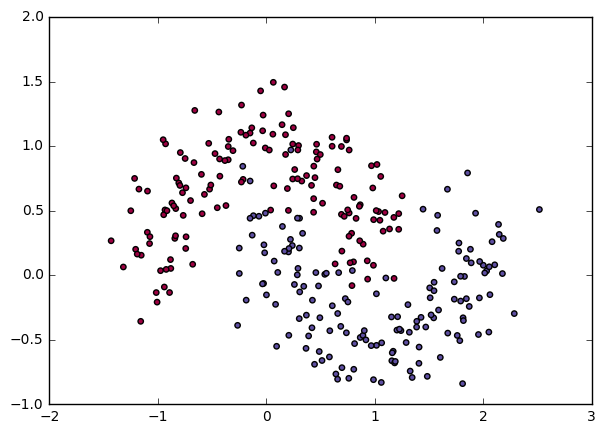

In [2]:
# Generate data
X, y = sklearn.datasets.make_moons(300, noise=0.22)
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=15, c=y, cmap=plt.cm.Spectral)
plt.show()

&nbsp;


## Feedforward Neural Network

In [3]:
# import feedforward neural net 
from mlnn import neural_net

<script type="text/javascript" src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS_HTML"></script>
Let's build a 4-layer neural network. Our network has one input layer, two hidden layer and one output layer. Our model can be represented as a directed acyclic graph wherein each node in a layer is connected all other nodes in its succesive layer. The neural net is shown below-

![neural network](nn.svg)

Each node in the hidden layer uses a nonlinear activation function $f(x)$, which computes the outputs from its inputs and transfer these outputs to successive layers. Here we've used $f(x)= tanh(x)$, as our non-linear activation. Its derivative is given by- $f'(x)= 1-tanh(x)^2$.  



Our network graph can be represented as-
![nn_graph](graph1.svg)

| Layer No. | Notation |         Value                                |  Variable | 
|----------:|-----------:|---------------------------------------------:|----------:|
|&nbsp;&nbsp;1          |    &nbsp;&nbsp;  X   |  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                                         $X$|          X|
|&nbsp;&nbsp; 2         |&nbsp;&nbsp; W1(~)+b1 | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;                                   $W1*X+b1$|&nbsp;&nbsp;   pre_act1|
| &nbsp;&nbsp;2         |&nbsp;&nbsp; tanh     | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;                            $tanh(W1*X+b1)$| &nbsp;&nbsp;      act1|
| &nbsp;&nbsp;3         |&nbsp;&nbsp; W2(~)+b2 | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;                    $W2*(tanh(W1*X +b1))+b2$| &nbsp;&nbsp;  pre_act2|
|&nbsp;&nbsp; 3         |&nbsp;&nbsp;    tanh  | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$tanh(W2*(tanhW1*X+b1))+b2)$| &nbsp;&nbsp;      act2|
| &nbsp;&nbsp;4         |&nbsp;&nbsp; W3(~)+b3  |&nbsp;&nbsp;&nbsp;$W3*(tanh(W2*(tanhW1*X+b1))+b2)+b3$ | &nbsp;&nbsp;   pre_act3|  
| &nbsp;&nbsp;4         |&nbsp;&nbsp; softmax  |$softmax(W3*(tanh(W2*(tanhW1*X+b1)+b2))+b3)$ </br>| &nbsp;&nbsp;   act3|  

# Backpropagation 

Now we formulate the backpropagation algorithm or backprop for training the network. For derivation of the backprop, please see Dr. Hugo  Larochelle's excellent course on [neural networks](https://www.youtube.com/watch?v=_KoWTD8T45Q&index=13&list=PL6Xpj9I5qXYEcOhn7TqghAJ6NAPrNmUBH). 

$ \large\frac{\partial L}{\partial Pred} = \frac{\partial L}{\partial L} * \frac{\partial L}{\partial Pred} $

$ \large\frac{\partial L}{\partial act3} = \frac{\partial L}{\partial Pred} * \frac{\partial Pred}{\partial act3} $

$ \large\frac{\partial L}{\partial pre\_act3} = \frac{\partial L}{\partial act3} * \frac{\partial act3}{\partial pre\_act3}= \delta4$  

$ \large\frac{\partial L}{\partial act2} = \frac{\partial L}{\partial pre\_act3} * \frac{\partial pre\_act3}{\partial act2} $

$ \large\frac{\partial L}{\partial pre\_act2} = \frac{\partial L}{\partial act2} * \frac{\partial act2}{\partial pre\_act2}= \delta3$  

$ \large\frac{\partial L}{\partial act1} = \frac{\partial L}{\partial pre\_act2} * \frac{\partial pre\_act2}{\partial act1} $

$ \large\frac{\partial L}{\partial pre\_act1} = \frac{\partial L}{\partial act1} * \frac{\partial act1}{\partial pre\_act1}= \delta2$  

$ \large\frac{\partial L}{\partial W3} = \delta4 * \frac{\partial pre\_act3}{\partial W3}$  

$ \large\frac{\partial L}{\partial W2} = \delta3 * \frac{\partial pre\_act2}{\partial W2}$  

$ \large\frac{\partial L}{\partial W1} = \delta2 * \frac{\partial pre\_act1}{\partial W1}$

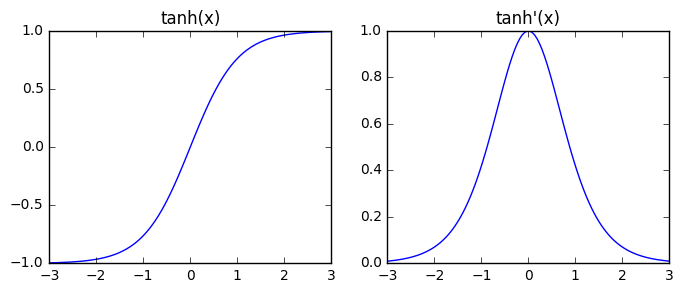

In [4]:
# Visualize tanh and its derivative
x = np.linspace(-np.pi, np.pi, 120)
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(x, np.tanh(x))
plt.title("tanh(x)")
plt.xlim(-3, 3)
plt.subplot(1, 2, 2)
plt.plot(x, 1 - np.square(np.tanh(x)))
plt.xlim(-3, 3)
plt.title("tanh\'(x)")
plt.show()

It can be seen from the above figure that as we increase our input the our activation starts to saturate which can inturn kill gradients. This can be mitigated using rectified activation functions. Another problem that we encounter in training deep neural networks during backpropagation is vanishing gradient and gradient explosion. It can be observed from the derivative of our nth activation- $\large\frac{\partial act\_n}{\partial pre\_act\_n}$ , is fairly large near zero. Let's assume that the weigths $< 1$, this will usually satisfy $|w_{i}*tanh'(x)| < 1$. The succesive product of such values in each layer will exponentially decrease the computed product leading to vanishing gradient. This is not a robust explanation of vanishing gradient problem. For more information refer to this [article](http://ieeexplore.ieee.org/document/279181/).  

Similarly if the weigths are large 100, 40.., we can formulate the gradient explosion problem.

In [5]:
# Training the neural network

my_nn = neural_net([2, 4, 2]) # [2,4,2] = [input nodes, hidden nodes, output nodes]

my_nn.train(X, y, 0.001, 0.0001) # weights regularization lambda= 0.001 , epsilon= 0.0001

Loss after iteration 0: 0.660183
Loss after iteration 1000: 0.175269
Loss after iteration 2000: 0.111643
Loss after iteration 3000: 0.094149
Loss after iteration 4000: 0.088562
Loss after iteration 5000: 0.085981
Loss after iteration 6000: 0.084407
Loss after iteration 7000: 0.083261
Loss after iteration 8000: 0.082333
Loss after iteration 9000: 0.081537
Loss after iteration 10000: 0.080832
Loss after iteration 11000: 0.080198
Loss after iteration 12000: 0.079624
Loss after iteration 13000: 0.079103
Loss after iteration 14000: 0.078629
Loss after iteration 15000: 0.078199
Loss after iteration 16000: 0.077808
Loss after iteration 17000: 0.077453
Loss after iteration 18000: 0.077131
Loss after iteration 19000: 0.076838
Loss after iteration 20000: 0.076570
Loss after iteration 21000: 0.076326
Loss after iteration 22000: 0.076101
Loss after iteration 23000: 0.075893
Loss after iteration 24000: 0.075699


{'W1': array([[-0.76071008,  1.29794021,  2.24362872,  2.23656231],
        [ 0.94445094, -0.09998954,  0.4010424 , -0.54756684]]),
 'W2': array([[ 1.80628703, -2.72874472],
        [-0.78210896,  0.56566481],
        [ 0.66658557,  0.350696  ],
        [ 2.46436296, -2.73567889]]),
 'W3': array([[ 1.80628703, -2.72874472],
        [-0.78210896,  0.56566481],
        [ 0.66658557,  0.350696  ],
        [ 2.46436296, -2.73567889]]),
 'b1': array([[ 0.13777515, -1.70262472, -1.33959754,  1.66877368]]),
 'b2': array([[-0.03793114,  0.1934682 , -0.09007265, -0.08813124]]),
 'b3': array([[-0.259843,  0.259843]])}

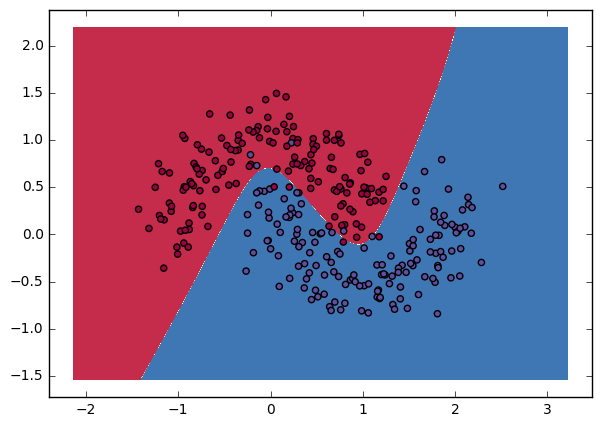

In [6]:
### visualize predictions
my_nn.visualize_preds(X ,y)

## Animate Training:

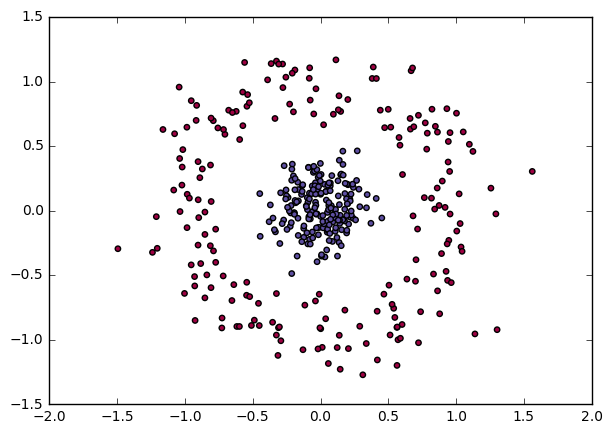

In [7]:
X_, y_ = sklearn.datasets.make_circles(n_samples=400, noise=0.18, factor=0.005, random_state=1)
plt.figure(figsize=(7, 5))
plt.scatter(X_[:, 0], X_[:, 1], s=15, c=y_, cmap=plt.cm.Spectral)
plt.show()    

In [ ]:
'''
Uncomment the code below to see classification process for above data.
To stop training early reduce no. of iterations.
'''

#new_nn = neural_net([2, 6, 2])
#new_nn.animate_preds(X_, y_, 0.001, 0.0001) # max iterations = 35000 